# TUTORIAL: LIMPIEZA DE DATOS CON PYTHON Y PANDAS

# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

#2. El set de datos

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco.csv`) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

#3. Una primera mirada al dataset

In [82]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# Lectura
from google.colab import drive

ruta = "/content/dataset_banco.csv"
data = pd.read_csv(ruta)

In [84]:
print(data.shape)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [85]:
# Checking for missing values and data types
data_info = data.info()
missing_values = data.isnull().sum()

data_info, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


(None,
 age          0
 job          2
 marital      1
 education    1
 default      0
 balance      2
 housing      0
 loan         0
 contact      0
 day          0
 month        0
 duration     1
 campaign     0
 pdays        1
 previous     0
 poutcome     0
 y            0
 dtype: int64)

#4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes

Comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:

##4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los vlaores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

##4.3 Filas repetidas

##4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.


##4.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

In [86]:
# Dropping rows with missing values since there are very few
data_cleaned = data.dropna()

# Checking for duplicates and removing them
data_cleaned = data_cleaned.drop_duplicates()

In [87]:
# Identifying and removing outliers for numerical columns using IQR method
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
Q1 = data_cleaned[numerical_cols].quantile(0.25)
Q3 = data_cleaned[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers
data_no_outliers = data_cleaned[~((data_cleaned[numerical_cols] < (Q1 - 1.5 * IQR)) |(data_cleaned[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [88]:
# Normalize the numerical columns
data_no_outliers.loc[:, numerical_cols] = data_no_outliers[numerical_cols].apply(lambda x: (x - x.mean()) / x.std())

data_no_outliers.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.783610,management,married,tertiary,no,1.847992,yes,no,unknown,5,may,0.399437,-0.886659,NaN,NaN,unknown,no
1,0.367080,technician,single,secondary,no,-0.694262,yes,no,unknown,5,may,-0.390155,-0.886659,NaN,NaN,unknown,no
2,-0.745908,entrepreneur,married,secondary,no,-0.726731,yes,yes,unknown,5,may,-0.928513,-0.886659,NaN,NaN,unknown,no
3,0.670622,blue-collar,married,unknown,no,1.081948,yes,no,unknown,5,may,-0.813663,-0.886659,NaN,NaN,unknown,no
4,-0.745908,unknown,single,unknown,no,-0.727934,no,no,unknown,5,may,-0.052784,-0.886659,NaN,NaN,unknown,no


##AGE

In [89]:
data_no_outliers['age'].describe()


count    2.818000e+04
mean     1.169950e-16
std      1.000000e+00
min     -2.263619e+00
25%     -8.470887e-01
50%     -1.388237e-01
75%      7.718028e-01
max      2.997778e+00
Name: age, dtype: float64

In [90]:
data_no_outliers.loc['age'] = pd.to_numeric(data_no_outliers['age'], errors='coerce')
data_no_outliers = data_no_outliers.dropna(subset=['age'])


<ipython-input-90-bcb2b37b22af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers.loc['age'] = pd.to_numeric(data_no_outliers['age'], errors='coerce')


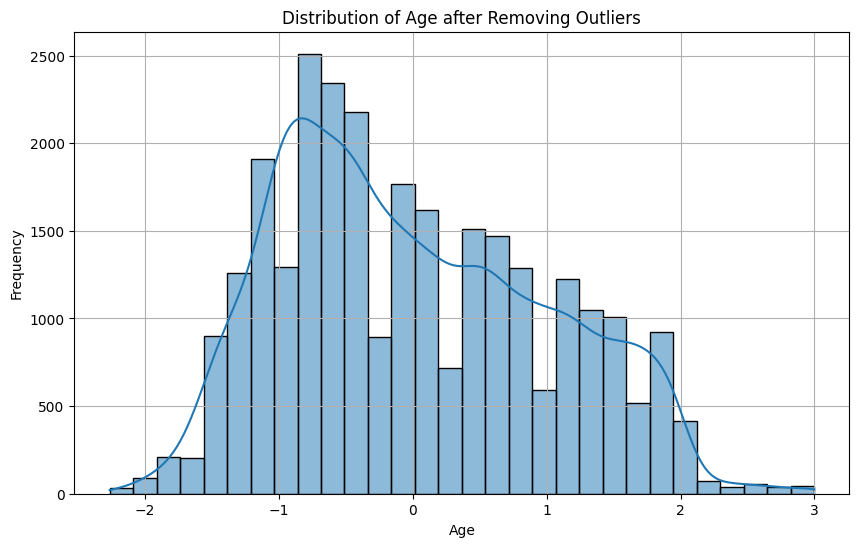

In [91]:
plt.figure(figsize=(10, 6))
sns.histplot(data_no_outliers['age'], kde=True, bins=30)
plt.title('Distribution of Age after Removing Outliers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



##JOB


In [92]:
# Descripción inicial
job_description = data_no_outliers['job'].describe()

job_description


count           28180
unique             18
top       blue-collar
freq             6361
Name: job, dtype: object

In [93]:
# Valores únicos
job_unique = data_no_outliers['job'].unique()

In [94]:
job_unique

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'Management', 'retired', 'admin.', 'services',
       'self-employed', 'MANAGEMENT', 'Self-employed', 'unemployed',
       'housemaid', 'student', 'Services', 'Retired', 'administrative'],
      dtype=object)

In [95]:
job_value_counts = data_no_outliers['job'].value_counts()

In [96]:
job_value_counts

job
blue-collar       6361
management        5599
technician        4800
admin.            3262
services          2740
retired           1141
entrepreneur       966
self-employed      956
housemaid          821
unemployed         819
student            531
unknown            174
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64

In [97]:
# Comprobar valores faltantes
missing_jobs = data_no_outliers['job'].isnull().sum()

# Frecuencia de valores únicos
missing_jobs


0

In [98]:
# Normalizar las categorías a minúsculas para evitar duplicados
data_no_outliers['job'] = data_no_outliers['job'].str.lower()

# Verificar los valores únicos después de la normalización
job_unique_normalized = data_no_outliers['job'].unique()
job_unique_normalized


array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student', 'administrative'],
      dtype=object)

In [99]:
# Reemplazar 'administrative' por 'admin.' en la columna 'job'
data_no_outliers.loc[data_no_outliers['job'] == 'administrative', 'job'] = 'admin.'

# Verificar los cambios
job_value_counts_updated = data_no_outliers['job'].value_counts()
print(job_value_counts_updated)


job
blue-collar      6361
management       5603
technician       4800
admin.           3265
services         2741
retired          1142
entrepreneur      966
self-employed     957
housemaid         821
unemployed        819
student           531
unknown           174
Name: count, dtype: int64


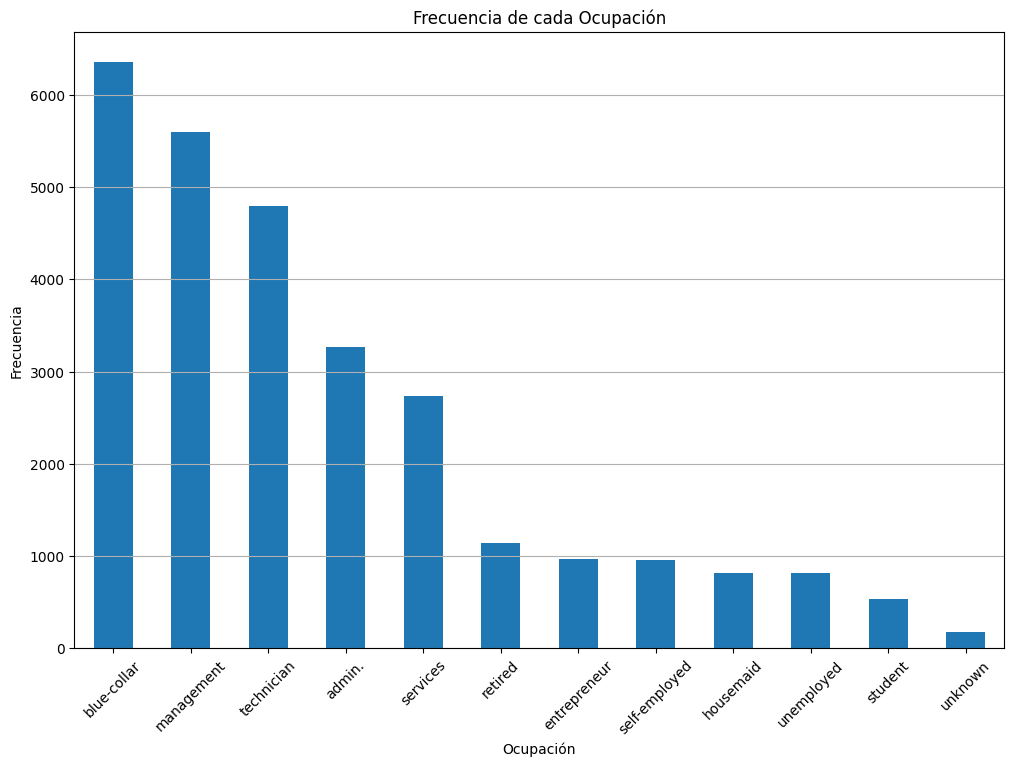

In [100]:
# Gráfico de barras de la variable 'job'
plt.figure(figsize=(12, 8))
job_value_counts_updated.plot(kind='bar')
plt.title('Frecuencia de cada Ocupación')
plt.xlabel('Ocupación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


#MARITAL

In [101]:
# Descripción inicial
marital_description = data_no_outliers['marital'].describe()

# Valores únicos
marital_unique = data_no_outliers['marital'].unique()

# Frecuencia de cada valor
marital_value_counts = data_no_outliers['marital'].value_counts()


In [102]:
marital_description

count       28180
unique          6
top       married
freq        16964
Name: marital, dtype: object

In [103]:
marital_unique

array(['married', 'single', 'div.', 'divorced', 'DIVORCED', 'Single'],
      dtype=object)

In [104]:
marital_value_counts

marital
married     16964
single       7881
divorced     3322
div.            7
DIVORCED        3
Single          3
Name: count, dtype: int64

In [105]:
# Comprobar errores tipográficos comparando valores únicos
marital_unique


array(['married', 'single', 'div.', 'divorced', 'DIVORCED', 'Single'],
      dtype=object)

In [106]:
# Reemplazar los valores según corresponda
data_no_outliers['marital'] = data_no_outliers['marital'].replace({
    'div.': 'divorced',
    'DIVORCED': 'divorced',
    'Single': 'single'
}).str.lower()

# Verificar los valores únicos después del reemplazo
marital_value_counts_updated = data_no_outliers['marital'].value_counts()
print(marital_value_counts_updated)


marital
married     16964
single       7884
divorced     3332
Name: count, dtype: int64


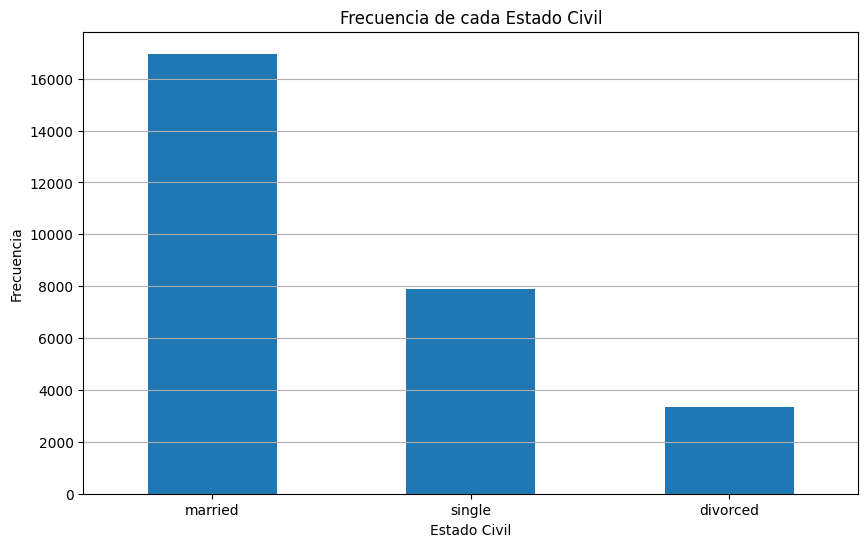

In [107]:
# Plotear un gráfico de barras de la variable 'marital'
plt.figure(figsize=(10, 6))
marital_value_counts_updated.plot(kind='bar')
plt.title('Frecuencia de cada Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


#EDUCATION

In [108]:
# Descripción inicial
education_description = data_no_outliers['education'].describe()

# Valores únicos
education_unique = data_no_outliers['education'].unique()

# Frecuencia de cada valor
education_value_counts = data_no_outliers['education'].value_counts()

education_description

count         28180
unique            9
top       secondary
freq          14882
Name: education, dtype: object

In [109]:
education_unique


array(['tertiary', 'secondary', 'unknown', 'primary', 'SECONDARY',
       'Secondary', 'sec.', 'UNK', 'Primary'], dtype=object)

In [110]:
education_value_counts

education
secondary    14882
tertiary      7789
primary       4395
unknown       1107
SECONDARY        2
UNK              2
Secondary        1
sec.             1
Primary          1
Name: count, dtype: int64

In [111]:
data_no_outliers['education'] = data_no_outliers['education'].replace({
    'SECONDARY': 'secondary',
    'Secondary': 'secondary',
    'sec.': 'secondary',
    'Tertiary': 'tertiary',
    'Primary': 'primary',
    'UNK': 'unknown'
}).str.lower()

# Verificar los valores únicos después de la normalización
education_value_counts_normalized = data_no_outliers['education'].value_counts()
print(education_value_counts_normalized)

education
secondary    14886
tertiary      7789
primary       4396
unknown       1109
Name: count, dtype: int64


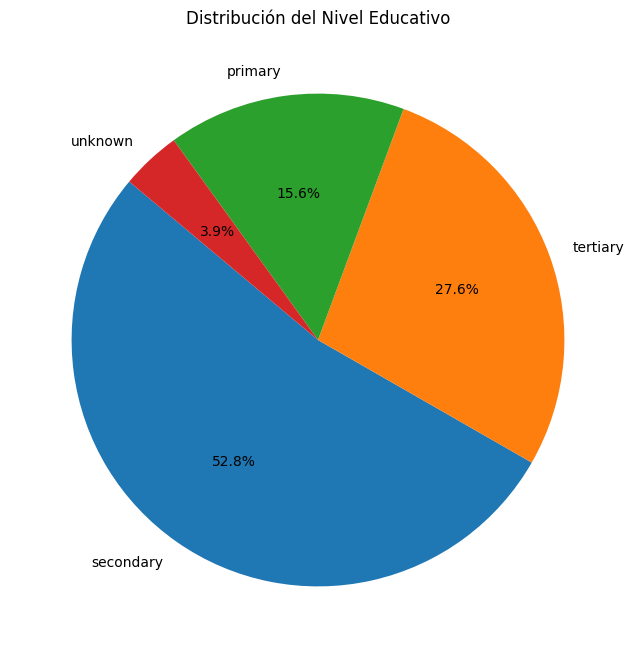

In [112]:
plt.figure(figsize=(8, 8))
education_value_counts_normalized.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribución del Nivel Educativo')
plt.ylabel('')
plt.show()

#DEFAULT

In [113]:
# Descripción inicial
default_description = data_no_outliers['default'].describe()

# Valores únicos
default_unique = data_no_outliers['default'].unique()

# Frecuencia de cada valor
default_value_counts = data_no_outliers['default'].value_counts()

default_description


count     28180
unique        2
top          no
freq      27552
Name: default, dtype: object

In [114]:
default_unique

array(['no', 'yes'], dtype=object)

In [115]:
default_value_counts

default
no     27552
yes      628
Name: count, dtype: int64

In [116]:
# Comprobar valores faltantes
missing_default = data_no_outliers['default'].isnull().sum()

# Frecuencia de valores únicos
missing_default


0

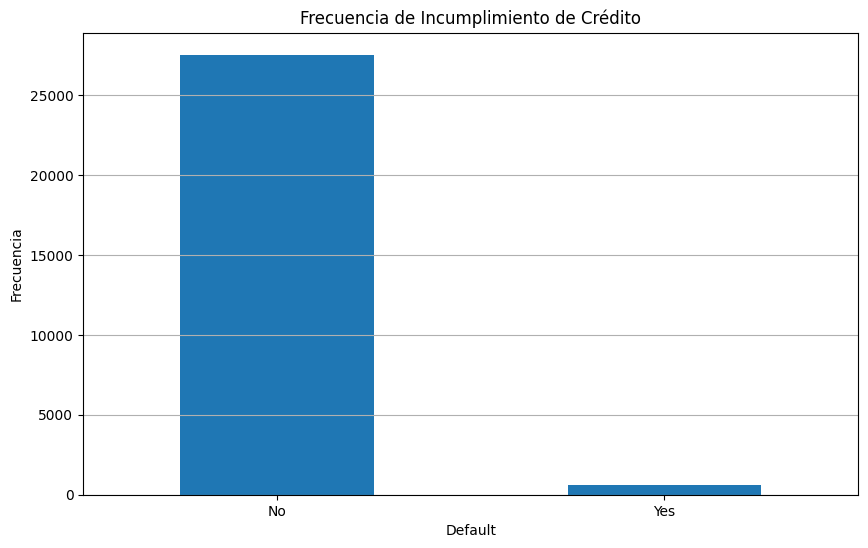

In [117]:
# Codificación binaria de la variable 'default'
data_no_outliers['default'] = data_no_outliers['default'].apply(lambda x: 1 if x == 'yes' else 0)

# Verificar la nueva codificación
default_value_counts_binary = data_no_outliers['default'].value_counts()

# Plotear un gráfico de barras de la variable 'default'
plt.figure(figsize=(10, 6))
default_value_counts_binary.plot(kind='bar')
plt.title('Frecuencia de Incumplimiento de Crédito')
plt.xlabel('Default')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.grid(axis='y')
plt.show()


# BALANCE


In [118]:
# Descripción inicial
balance_description = data_no_outliers['balance'].describe()
print("Descripción inicial:", balance_description)


Descripción inicial: count    2.818000e+04
mean     5.042887e-17
std      1.000000e+00
min     -3.066952e+00
25%     -6.918567e-01
50%     -3.491214e-01
75%      3.760341e-01
max      3.431789e+00
Name: balance, dtype: float64


In [119]:
# Comprobar valores faltantes
missing_balance = data_no_outliers['balance'].isnull().sum()
print("Valores faltantes en 'balance':", missing_balance)

Valores faltantes en 'balance': 0


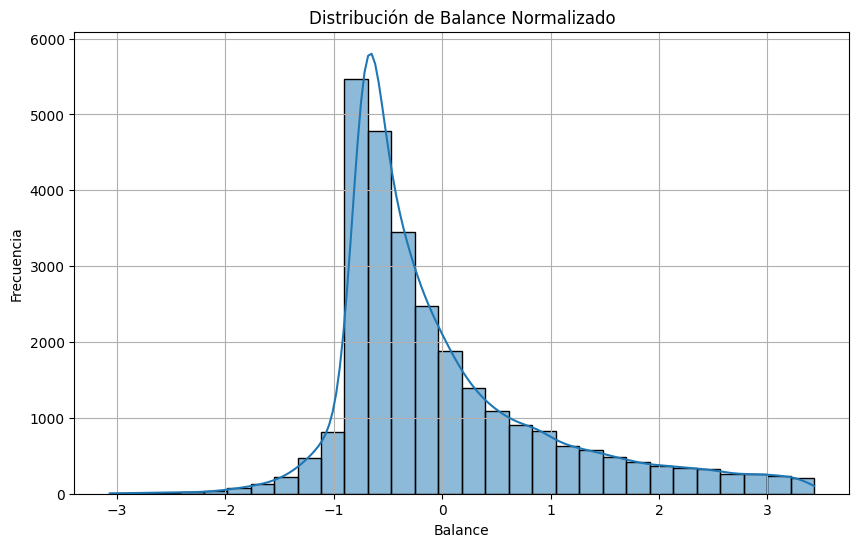

In [120]:

# Visualización de la distribución de 'balance'
plt.figure(figsize=(10, 6))
sns.histplot(data_no_outliers['balance'], kde=True, bins=30)
plt.title('Distribución de Balance Normalizado')
plt.xlabel('Balance')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


#HOUSING

In [121]:
# Descripción inicial
housing_description = data_no_outliers['housing'].describe()

# Valores únicos
housing_unique = data_no_outliers['housing'].unique()

# Frecuencia de cada valor
housing_value_counts = data_no_outliers['housing'].value_counts()

# Comprobar valores faltantes
missing_housing = data_no_outliers['housing'].isnull().sum()


In [122]:
# Mostrar resultados iniciales
print("Descripción inicial:", housing_description)

Descripción inicial: count     28180
unique        2
top         yes
freq      15622
Name: housing, dtype: object


In [123]:
print("\nValores únicos:", housing_unique)


Valores únicos: ['yes' 'no']


In [124]:
print("\nFrecuencia de valores únicos:\n", housing_value_counts)


Frecuencia de valores únicos:
 housing
yes    15622
no     12558
Name: count, dtype: int64


In [125]:
print("\nValores faltantes en 'housing':", missing_housing)


Valores faltantes en 'housing': 0


In [126]:
# Comprobar errores tipográficos comparando valores únicos
housing_unique

array(['yes', 'no'], dtype=object)

In [127]:
# Codificación binaria de la variable 'housing'
data_no_outliers['housing'] = data_no_outliers['housing'].apply(lambda x: 1 if x == 'yes' else 0)

# Verificar la nueva codificación
data_no_outliers[['housing']].head()

,housing
0,1
1,1
2,1
3,1
4,0


# LOAN

In [128]:
# Descripción inicial
loan_description = data_no_outliers['loan'].describe()

# Valores únicos
loan_unique = data_no_outliers['loan'].unique()

# Frecuencia de cada valor
loan_value_counts = data_no_outliers['loan'].value_counts()

loan_description, loan_unique, loan_value_counts


(count     28180
 unique        6
 top          no
 freq      23214
 Name: loan, dtype: object,
 array(['no', 'yes', 'No', 'YES', 'Yes', 'NO'], dtype=object),
 loan
 no     23214
 yes     4957
 No         5
 YES        2
 Yes        1
 NO         1
 Name: count, dtype: int64)

In [129]:
# Normalizar los valores para corregir errores tipográficos
data_no_outliers['loan'] = data_no_outliers['loan'].str.lower()

# Verificar los valores únicos después de la normalización
loan_value_counts_normalized = data_no_outliers['loan'].value_counts()
loan_value_counts_normalized


loan
no     23220
yes     4960
Name: count, dtype: int64

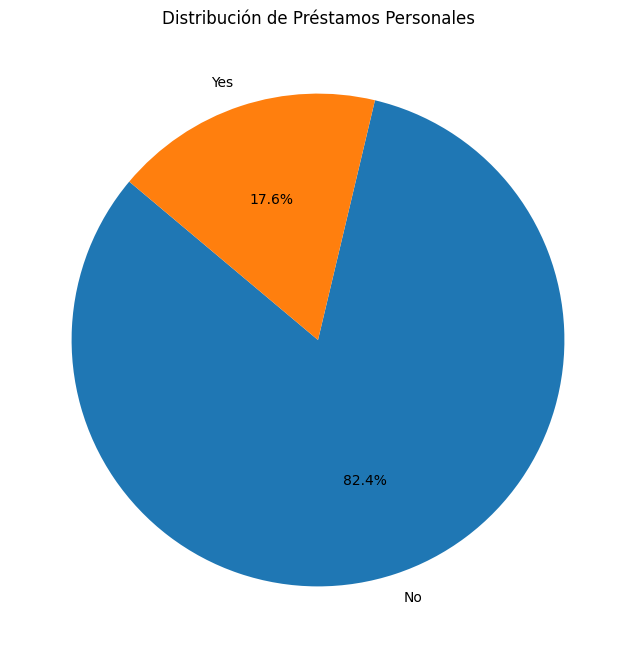

In [130]:
# Codificación binaria de la variable 'loan'
data_no_outliers['loan'] = data_no_outliers['loan'].apply(lambda x: 1 if x == 'yes' else 0)

# Verificar la nueva codificación
loan_value_counts_binary = data_no_outliers['loan'].value_counts()

# Plotear un gráfico de tarta de la variable 'loan'
plt.figure(figsize=(8, 8))
loan_value_counts_binary.plot(kind='pie', autopct='%1.1f%%', startangle=140, labels=['No', 'Yes'])
plt.title('Distribución de Préstamos Personales')
plt.ylabel('')
plt.show()


# CONTACT

In [131]:
# Descripción inicial
contact_description = data_no_outliers['contact'].describe()

# Valores únicos
contact_unique = data_no_outliers['contact'].unique()

# Frecuencia de cada valor
contact_value_counts = data_no_outliers['contact'].value_counts()

contact_description, contact_unique, contact_value_counts


(count        28180
 unique           5
 top       cellular
 freq         16476
 Name: contact, dtype: object,
 array(['unknown', 'cellular', 'telephone', 'phone', 'mobile'],
       dtype=object),
 contact
 cellular     16476
 unknown      10213
 telephone     1488
 phone            2
 mobile           1
 Name: count, dtype: int64)

In [132]:
# Reemplazar valores para normalizar las categorías
data_no_outliers['contact'] = data_no_outliers['contact'].replace({
    'phone': 'telephone',
    'mobile': 'cellular'
}).str.lower()

# Verificar los valores únicos después de la normalización
contact_value_counts_normalized = data_no_outliers['contact'].value_counts()
contact_value_counts_normalized


contact
cellular     16477
unknown      10213
telephone     1490
Name: count, dtype: int64

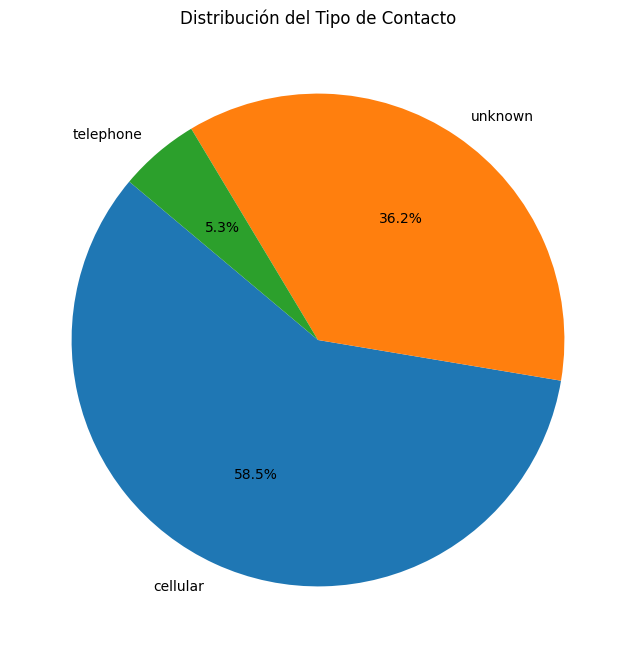

In [133]:
# Plotear un gráfico de tarta de la variable 'contact'
plt.figure(figsize=(8, 8))
contact_value_counts_normalized.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribución del Tipo de Contacto')
plt.ylabel('')
plt.show()


# DAY

In [134]:
# Descripción inicial
day_description = data_no_outliers['day'].describe()

# Valores únicos
day_unique = data_no_outliers['day'].unique()

# Frecuencia de cada valor
day_value_counts = data_no_outliers['day'].value_counts()

day_description, day_unique, day_value_counts


(count    28180.000000
 mean        15.777431
 std          8.357043
 min          1.000000
 25%          8.000000
 50%         16.000000
 75%         22.000000
 max         31.000000
 Name: day, dtype: float64,
 array([ 5.,  6.,  8.,  7.,  9., 12., 13., 14., 15., 16., 19., 20., 21.,
        23., 26., 27., 28., 29., 30.,  2.,  3.,  4., 11., 17., 18., 24.,
        25.,  1., 10., 22., 31.]),
 day
 20.0    1591
 18.0    1336
 8.0     1289
 6.0     1287
 5.0     1256
 7.0     1234
 21.0    1233
 14.0    1173
 28.0    1168
 17.0    1160
 29.0    1120
 9.0     1112
 19.0    1099
 30.0     968
 12.0     941
 15.0     918
 13.0     906
 16.0     886
 4.0      866
 11.0     862
 2.0      767
 27.0     756
 26.0     688
 23.0     674
 3.0      628
 22.0     611
 25.0     505
 10.0     339
 31.0     337
 24.0     308
 1.0      162
 Name: count, dtype: int64)

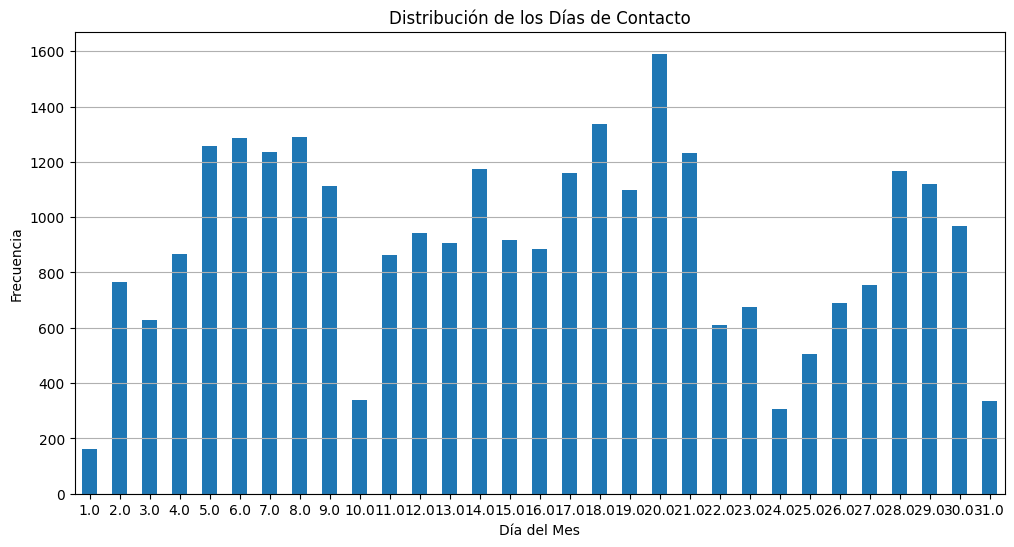

In [135]:
# Plotear un gráfico de barras de la variable 'day'
plt.figure(figsize=(12, 6))
day_value_counts.sort_index().plot(kind='bar')
plt.title('Distribución de los Días de Contacto')
plt.xlabel('Día del Mes')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


#MONTH

In [136]:
# Descripción inicial
month_description = data_no_outliers['month'].describe()

# Valores únicos
month_unique = data_no_outliers['month'].unique()

# Frecuencia de cada valor
month_value_counts = data_no_outliers['month'].value_counts()

month_description, month_unique, month_value_counts


(count     28180
 unique       12
 top         may
 freq       9214
 Name: month, dtype: object,
 array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
        'mar', 'apr', 'sep'], dtype=object),
 month
 may    9214
 jul    5049
 aug    4048
 jun    3690
 nov    1930
 apr    1397
 feb    1342
 jan     780
 oct     265
 mar     213
 sep     183
 dec      69
 Name: count, dtype: int64)

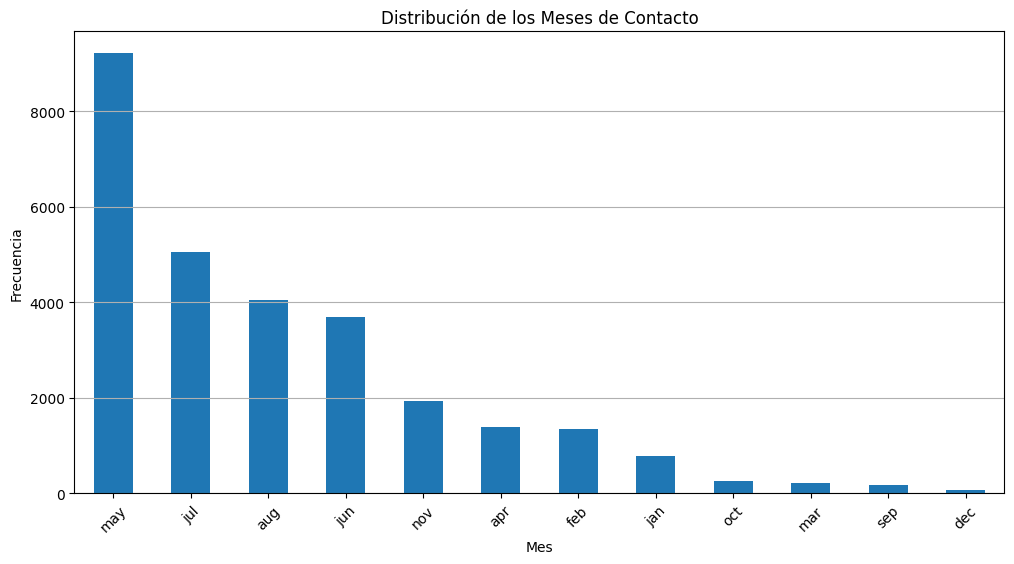

In [137]:
# Plotear un gráfico de barras de la variable 'month'
plt.figure(figsize=(12, 6))
month_value_counts.plot(kind='bar')
plt.title('Distribución de los Meses de Contacto')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


#DURATION

In [138]:
# Descripción inicial
duration_description = data_no_outliers['duration'].describe()

# Valores únicos
duration_unique = data_no_outliers['duration'].unique()

# Frecuencia de cada valor
duration_value_counts = data_no_outliers['duration'].value_counts()

duration_description, duration_unique, duration_value_counts


(count    2.818000e+04
 mean     1.109435e-17
 std      1.000000e+00
 min     -1.474049e+00
 25%     -7.490604e-01
 50%     -2.609492e-01
 75%      5.142864e-01
 max      3.141474e+00
 Name: duration, dtype: float64,
 array([ 3.99436695e-01, -3.90155082e-01, -9.28513111e-01, -8.13663398e-01,
        -5.27840498e-02, -4.76292366e-01,  8.35999843e-02,  1.25363144e+00,
        -1.11514389e+00, -1.07925336e+00,  1.19490520e-01, -4.90648580e-01,
        -9.64403646e-01, -2.25058619e-01,  1.05982254e+00, -7.70594756e-01,
        -1.20128118e+00,  9.79561985e-02, -1.08643147e+00,  4.06614802e-01,
        -2.96839690e-01, -3.25552118e-01,  9.80863367e-01, -1.74811870e-01,
        -2.39414833e-01,  6.50670442e-01, -5.62429651e-01,  3.56368053e-01,
         1.02393201e+00,  1.41024841e-01,  1.76915376e-01,  1.89970208e-02,
         1.48202948e-01,  2.63052661e-01,  1.14595983e+00,  2.66771853e+00,
        -1.81989977e-01, -1.31613089e+00,  2.94766470e+00,  1.07417876e+00,
         1.13160362e+00

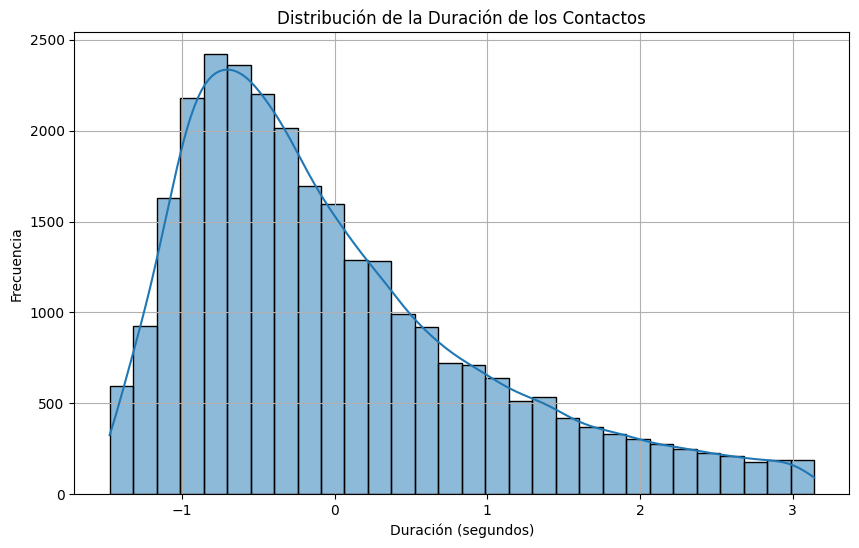

In [139]:
# Visualización de la distribución de 'duration'
plt.figure(figsize=(10, 6))
sns.histplot(data_no_outliers['duration'], kde=True, bins=30)
plt.title('Distribución de la Duración de los Contactos')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


# CAMPAING

In [140]:
# Descripción inicial
campaign_description = data_no_outliers['campaign'].describe()

# Valores únicos
campaign_unique = data_no_outliers['campaign'].unique()

# Frecuencia de cada valor
campaign_value_counts = data_no_outliers['campaign'].value_counts()

campaign_description, campaign_unique, campaign_value_counts


(count    2.818000e+04
 mean     9.682342e-17
 std      1.000000e+00
 min     -8.866588e-01
 25%     -8.866588e-01
 50%     -1.414074e-01
 75%      6.038441e-01
 max      2.839598e+00
 Name: campaign, dtype: float64,
 array([-0.88665877, -0.14140736,  0.60384406,  2.09434689,  1.34909547,
         2.8395983 ]),
 campaign
 -0.886659    11171
 -0.141407     8434
  0.603844     3784
  1.349095     2575
  2.094347     1280
  2.839598      936
 Name: count, dtype: int64)

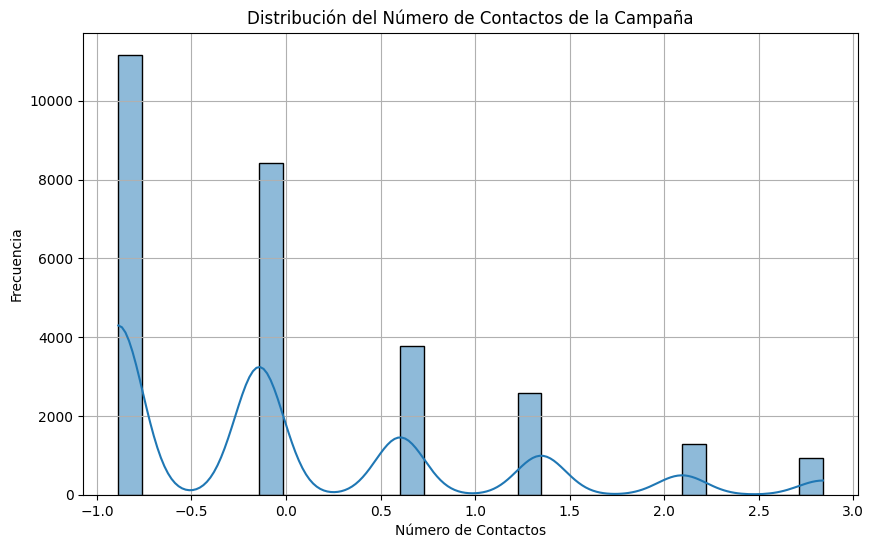

In [141]:
# Visualización de la distribución de 'campaign'
plt.figure(figsize=(10, 6))
sns.histplot(data_no_outliers['campaign'], kde=True, bins=30)
plt.title('Distribución del Número de Contactos de la Campaña')
plt.xlabel('Número de Contactos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


#PDAYS

In [142]:
# Descripción inicial
pdays_description = data_no_outliers['pdays'].describe()

# Valores únicos
pdays_unique = data_no_outliers['pdays'].unique()

# Frecuencia de cada valor
pdays_value_counts = data_no_outliers['pdays'].value_counts()

pdays_description, pdays_unique, pdays_value_counts


(count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: pdays, dtype: float64,
 array([nan]),
 Series([], Name: count, dtype: int64))

In [143]:
# Sustituir valores NaN en 'pdays' por -1
data_no_outliers['pdays'] = data_no_outliers['pdays'].fillna(-1)

# Verificar que se han sustituido correctamente
missing_pdays_after = data_no_outliers['pdays'].isnull().sum()
print("Valores faltantes en 'pdays' después de la sustitución:", missing_pdays_after)

# Mostrar los primeros registros para confirmar los cambios
data_no_outliers[['pdays']].head()


Valores faltantes en 'pdays' después de la sustitución: 0


,pdays
0,-1.0
1,-1.0
2,-1.0
3,-1.0
4,-1.0


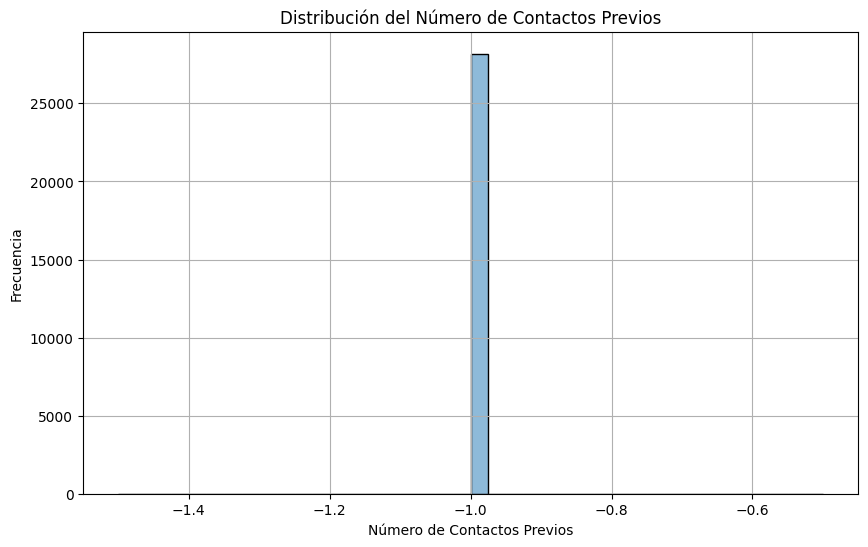

In [148]:
# Visualización de la distribución de 'previous'
plt.figure(figsize=(10, 6))
sns.histplot(data_no_outliers['pdays'], kde=True, bins=40)
plt.title('Distribución del Número de Contactos Previos')
plt.xlabel('Número de Contactos Previos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


#PREVIOUS

In [144]:
# Descripción inicial
previous_description = data_no_outliers['previous'].describe()

# Valores únicos
previous_unique = data_no_outliers['previous'].unique()

# Frecuencia de cada valor
previous_value_counts = data_no_outliers['previous'].value_counts()

previous_description, previous_unique, previous_value_counts


(count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: previous, dtype: float64,
 array([nan]),
 Series([], Name: count, dtype: int64))

In [145]:
# Sustituir valores NaN en 'previous' por -1
data_no_outliers['previous'] = data_no_outliers['previous'].fillna(-1)

# Verificar que se han sustituido correctamente
missing_previous_after = data_no_outliers['previous'].isnull().sum()
print("Valores faltantes en 'previous' después de la sustitución:", missing_previous_after)

# Mostrar los primeros registros para confirmar los cambios
data_no_outliers[['previous']].head()


Valores faltantes en 'previous' después de la sustitución: 0


,previous
0,-1.0
1,-1.0
2,-1.0
3,-1.0
4,-1.0


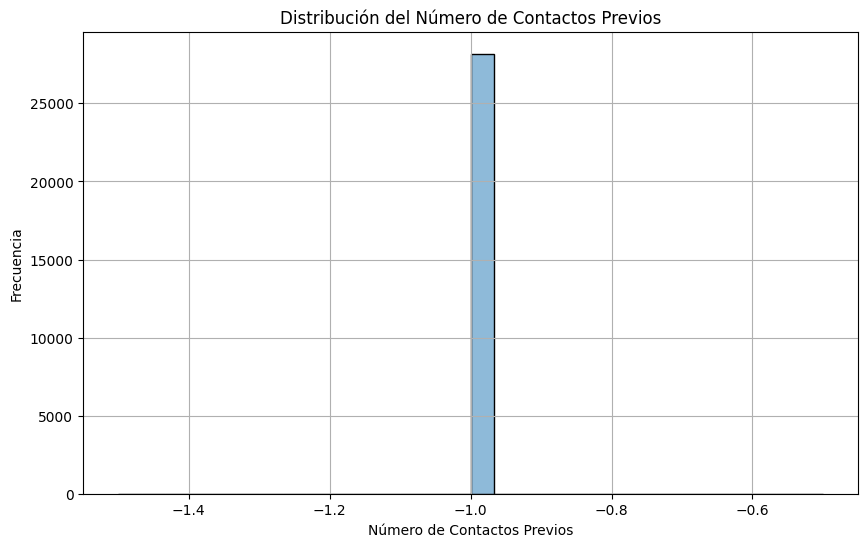

In [146]:
# Visualización de la distribución de 'previous'
plt.figure(figsize=(10, 6))
sns.histplot(data_no_outliers['previous'], kde=True, bins=30)
plt.title('Distribución del Número de Contactos Previos')
plt.xlabel('Número de Contactos Previos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


#POUTCOME

In [149]:
# Descripción inicial
poutcome_description = data_no_outliers['poutcome'].describe()

# Valores únicos
poutcome_unique = data_no_outliers['poutcome'].unique()

# Frecuencia de cada valor
poutcome_value_counts = data_no_outliers['poutcome'].value_counts()

poutcome_description, poutcome_unique, poutcome_value_counts


(count       28180
 unique          2
 top       unknown
 freq        28176
 Name: poutcome, dtype: object,
 array(['unknown', 'UNK'], dtype=object),
 poutcome
 unknown    28176
 UNK            4
 Name: count, dtype: int64)

In [150]:
# Reemplazar valores para normalizar las categorías
data_no_outliers['poutcome'] = data_no_outliers['poutcome'].replace({
    'UNK': 'unknown',
    'Success': 'success'
}).str.lower()

# Verificar los valores únicos después de la normalización
poutcome_value_counts_normalized = data_no_outliers['poutcome'].value_counts()
poutcome_value_counts_normalized


poutcome
unknown    28180
Name: count, dtype: int64

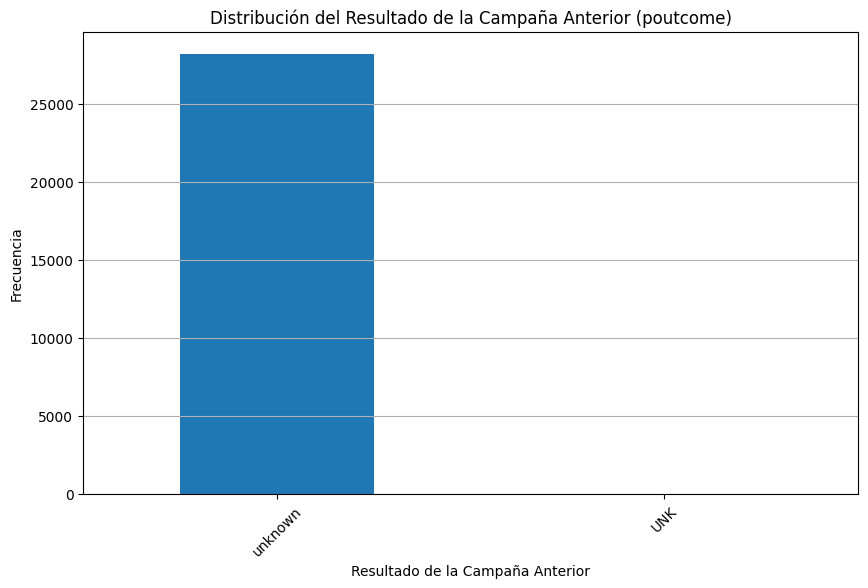

In [154]:
# Plotear un gráfico de barras de la variable 'poutcome'
plt.figure(figsize=(10, 6))
poutcome_value_counts.plot(kind='bar')
plt.title('Distribución del Resultado de la Campaña Anterior (poutcome)')
plt.xlabel('Resultado de la Campaña Anterior')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
